In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df1 = pd.read_csv('Divvy_Trips_2019_Q1.csv')
df2 = pd.read_csv('Divvy_Trips_2019_Q2.csv')
df3 = pd.read_csv('Divvy_Trips_2019_Q3.csv')
df4 = pd.read_csv('Divvy_Trips_2019_Q4.csv')

In [3]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3758411,25962900,2019-12-31 23:56:13,2020-01-01 00:15:45,2196,"1,172.0",112,Green St & Randolph St,225,Halsted St & Dickens Ave,Subscriber,Male,1981.0
3758412,25962901,2019-12-31 23:56:34,2020-01-01 00:22:08,4877,"1,533.0",90,Millennium Park,90,Millennium Park,Subscriber,Male,1992.0
3758413,25962902,2019-12-31 23:57:05,2020-01-01 00:05:46,863,520.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Male,1967.0
3758414,25962903,2019-12-31 23:57:11,2020-01-01 00:05:45,2637,514.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Female,1970.0


In [10]:
(df.isnull().sum()/len(df))*100

,0
trip_id,0.000000
start_time,0.000000
end_time,0.000000
bikeid,0.000000
tripduration,0.000000
from_station_id,0.000000
from_station_name,0.000000
to_station_id,0.000000
to_station_name,0.000000
usertype,0.000000


In [19]:
df['z_score'] = (df['birthyear'] - df['birthyear'].mean()) / df['birthyear'].std()

# Filter outliers
outliers = df[np.abs(df['z_score']) > 3]

In [20]:
outliers

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,z_score
144,21742596,2019-01-01 04:05:03,2019-01-01 04:09:30,218,267.0,514,Ridge Blvd & Howard St,515,Paulina St & Howard St,Subscriber,Male,1951.0,-3.039163
167,21742619,2019-01-01 06:42:13,2019-01-01 06:50:15,5782,482.0,339,Emerald Ave & 31st St,403,Wentworth Ave & 33rd St,Subscriber,Female,1947.0,-3.406956
180,21742632,2019-01-01 07:31:18,2019-01-01 07:51:38,5711,"1,220.0",72,Wabash Ave & 16th St,133,Kingsbury St & Kinzie St,Subscriber,Male,1946.0,-3.498905
230,21742684,2019-01-01 09:06:43,2019-01-01 09:45:36,3474,"2,333.0",150,Fort Dearborn Dr & 31st St,150,Fort Dearborn Dr & 31st St,Subscriber,Male,1950.0,-3.131112
236,21742690,2019-01-01 09:13:38,2019-01-01 09:30:33,3728,"1,015.0",118,Sedgwick St & North Ave,133,Kingsbury St & Kinzie St,Subscriber,Male,1950.0,-3.131112
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757535,25961970,2019-12-31 15:14:10,2019-12-31 15:17:32,5850,201.0,418,Ellis Ave & 53rd St,322,Kimbark Ave & 53rd St,Subscriber,Female,1949.0,-3.223060
3757659,25962099,2019-12-31 15:49:27,2019-12-31 15:52:55,6011,207.0,322,Kimbark Ave & 53rd St,418,Ellis Ave & 53rd St,Subscriber,Female,1949.0,-3.223060
3758006,25962464,2019-12-31 17:29:36,2019-12-31 17:44:27,2318,890.0,37,Dearborn St & Adams St,35,Streeter Dr & Grand Ave,Subscriber,Male,1948.0,-3.315008
3758014,25962473,2019-12-31 17:31:10,2019-12-31 17:34:39,4078,209.0,329,Lake Shore Dr & Diversey Pkwy,157,Lake Shore Dr & Wellington Ave,Subscriber,Male,1949.0,-3.223060


<Axes: ylabel='birthyear'>

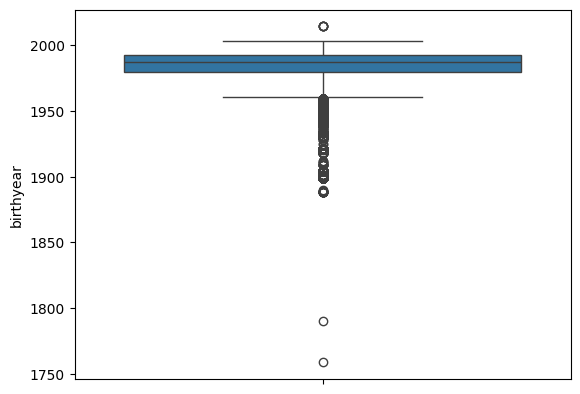

In [25]:
sns.boxplot(df['birthyear'])

In [78]:
Q1 = df['birthyear'].quantile(0.25)
Q3 = df['birthyear'].quantile(0.75)
IQR = Q3 - Q1

In [79]:
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

In [80]:
lower_fence

1959.5

In [81]:
upper_fence

2011.5

In [82]:
df[(df.birthyear >= lower_fence) & (df.birthyear <= upper_fence)]


,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,z_score,birthyear_new
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,0.454870,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,0.546819,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,0.914612,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,0.822663,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,0.914612,1994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3758411,25962900,2019-12-31 23:56:13,2020-01-01 00:15:45,2196,"1,172.0",112,Green St & Randolph St,225,Halsted St & Dickens Ave,Subscriber,Male,1981.0,-0.280716,1981.0
3758412,25962901,2019-12-31 23:56:34,2020-01-01 00:22:08,4877,"1,533.0",90,Millennium Park,90,Millennium Park,Subscriber,Male,1992.0,0.730715,1992.0
3758413,25962902,2019-12-31 23:57:05,2020-01-01 00:05:46,863,520.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Male,1967.0,-1.567991,1967.0
3758414,25962903,2019-12-31 23:57:11,2020-01-01 00:05:45,2637,514.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Female,1970.0,-1.292146,1970.0


In [83]:
df[(df.birthyear >= upper_fence) | (df.birthyear <= lower_fence)]

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,z_score,birthyear_new
20,21742464,2019-01-01 00:29:21,2019-01-01 00:45:21,140,960.0,47,State St & Kinzie St,111,Sedgwick St & Huron St,Subscriber,Male,1957.0,-2.487474,1957.0
22,21742466,2019-01-01 00:29:47,2019-01-01 00:49:15,5026,"1,168.0",85,Michigan Ave & Oak St,329,Lake Shore Dr & Diversey Pkwy,Subscriber,Male,1959.0,-2.303577,1959.0
61,21742508,2019-01-01 01:26:27,2019-01-01 01:45:56,4105,"1,169.0",29,Noble St & Milwaukee Ave,137,Morgan Ave & 14th Pl,Subscriber,Female,1952.0,-2.947215,1952.0
121,21742571,2019-01-01 02:51:20,2019-01-01 03:36:56,544,"2,736.0",318,Southport Ave & Irving Park Rd,119,Ashland Ave & Lake St (Temp),Subscriber,Male,1954.0,-2.763319,1954.0
144,21742596,2019-01-01 04:05:03,2019-01-01 04:09:30,218,267.0,514,Ridge Blvd & Howard St,515,Paulina St & Howard St,Subscriber,Male,1951.0,-3.039163,1951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3758048,25962509,2019-12-31 17:51:04,2019-12-31 18:28:13,3571,"2,228.0",191,Canal St & Monroe St,67,Sheffield Ave & Fullerton Ave,Subscriber,Female,1958.0,-2.395526,1958.0
3758059,25962522,2019-12-31 17:55:54,2019-12-31 18:07:23,2041,689.0,116,Western Ave & Winnebago Ave,224,Halsted St & Willow St,Subscriber,Female,1957.0,-2.487474,1957.0
3758126,25962599,2019-12-31 18:32:52,2019-12-31 18:43:28,5270,636.0,284,Michigan Ave & Jackson Blvd,26,McClurg Ct & Illinois St,Subscriber,Male,1958.0,-2.395526,1958.0
3758198,25962672,2019-12-31 19:19:03,2019-12-31 19:28:49,4557,586.0,24,Fairbanks Ct & Grand Ave,140,Dearborn Pkwy & Delaware Pl,Subscriber,Male,1955.0,-2.671370,1955.0


In [86]:
#dealing with outliers by filling the median value in place of them in new column
df['birthyear_new'] = df['birthyear']



In [98]:
np.where((df['birthyear_new'] >= upper_fence) & (df['birthyear_new'] <= lower_fence) , df['birthyear_new'].median(), df['birthyear_new'])
df

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,z_score,birthyear_new
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,0.454870,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,0.546819,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,0.914612,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,0.822663,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,0.914612,1994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3758411,25962900,2019-12-31 23:56:13,2020-01-01 00:15:45,2196,"1,172.0",112,Green St & Randolph St,225,Halsted St & Dickens Ave,Subscriber,Male,1981.0,-0.280716,1981.0
3758412,25962901,2019-12-31 23:56:34,2020-01-01 00:22:08,4877,"1,533.0",90,Millennium Park,90,Millennium Park,Subscriber,Male,1992.0,0.730715,1992.0
3758413,25962902,2019-12-31 23:57:05,2020-01-01 00:05:46,863,520.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Male,1967.0,-1.567991,1967.0
3758414,25962903,2019-12-31 23:57:11,2020-01-01 00:05:45,2637,514.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Female,1970.0,-1.292146,1970.0


In [99]:
df.isnull().sum()/len(df)*100

,0
trip_id,0.000000
start_time,0.000000
end_time,0.000000
bikeid,0.000000
tripduration,0.000000
from_station_id,0.000000
from_station_name,0.000000
to_station_id,0.000000
to_station_name,0.000000
usertype,0.000000


In [96]:
df.gender.mode()[0]

'Male'

In [95]:
df.gender.fillna(df.gender.mode()[0], inplace=True)

In [94]:
df

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,z_score,birthyear_new
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,0.454870,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,0.546819,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,0.914612,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,0.822663,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,0.914612,1994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3758411,25962900,2019-12-31 23:56:13,2020-01-01 00:15:45,2196,"1,172.0",112,Green St & Randolph St,225,Halsted St & Dickens Ave,Subscriber,Male,1981.0,-0.280716,1981.0
3758412,25962901,2019-12-31 23:56:34,2020-01-01 00:22:08,4877,"1,533.0",90,Millennium Park,90,Millennium Park,Subscriber,Male,1992.0,0.730715,1992.0
3758413,25962902,2019-12-31 23:57:05,2020-01-01 00:05:46,863,520.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Male,1967.0,-1.567991,1967.0
3758414,25962903,2019-12-31 23:57:11,2020-01-01 00:05:45,2637,514.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Female,1970.0,-1.292146,1970.0


In [100]:
df.birthyear_new.fillna(df.birthyear_new.median(), inplace=True)

In [101]:
df.isnull().sum()/len(df)*100

,0
trip_id,0.000000
start_time,0.000000
end_time,0.000000
bikeid,0.000000
tripduration,0.000000
from_station_id,0.000000
from_station_name,0.000000
to_station_id,0.000000
to_station_name,0.000000
usertype,0.000000


In [64]:
df.duplicated().sum()

0

In [108]:
Q11 = df['birthyear_new'].quantile(0.25)
Q33 = df['birthyear_new'].quantile(0.75)
IQR = Q33 - Q11
lower_fence22 = Q11 - 1.5 * IQR
upper_fence22 = Q33 + 1.5 * IQR

In [109]:
df[(df['birthyear_new'] < lower_fence22) | (df['birthyear_new'] > upper_fence22)]


,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,z_score,birthyear_new
20,21742464,2019-01-01 00:29:21,2019-01-01 00:45:21,140,960.0,47,State St & Kinzie St,111,Sedgwick St & Huron St,Subscriber,Male,1957.0,-2.487474,1957.0
22,21742466,2019-01-01 00:29:47,2019-01-01 00:49:15,5026,"1,168.0",85,Michigan Ave & Oak St,329,Lake Shore Dr & Diversey Pkwy,Subscriber,Male,1959.0,-2.303577,1959.0
25,21742469,2019-01-01 00:34:35,2019-01-01 00:38:25,3722,230.0,520,Greenview Ave & Jarvis Ave,523,Eastlake Ter & Rogers Ave,Subscriber,Male,1961.0,-2.119681,1961.0
27,21742472,2019-01-01 00:38:47,2019-01-01 00:50:38,1704,711.0,256,Broadway & Sheridan Rd,297,Paulina St & Montrose Ave,Subscriber,Male,1964.0,-1.843836,1964.0
32,21742477,2019-01-01 00:46:19,2019-01-01 00:51:26,2314,307.0,144,Larrabee St & Webster Ave,313,Lakeview Ave & Fullerton Pkwy,Subscriber,Female,1961.0,-2.119681,1961.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3758286,25962767,2019-12-31 20:49:19,2019-12-31 20:53:15,728,236.0,520,Greenview Ave & Jarvis Ave,523,Eastlake Ter & Rogers Ave,Subscriber,Male,1961.0,-2.119681,1961.0
3758314,25962795,2019-12-31 21:34:06,2019-12-31 21:39:04,993,298.0,106,State St & Pearson St,620,Orleans St & Chestnut St (NEXT Apts),Subscriber,Male,1964.0,-1.843836,1964.0
3758328,25962812,2019-12-31 21:50:55,2019-12-31 22:05:22,5836,866.0,55,Halsted St & Roosevelt Rd,109,900 W Harrison St,Subscriber,Male,1961.0,-2.119681,1961.0
3758330,25962814,2019-12-31 22:00:17,2019-12-31 22:06:08,2694,351.0,90,Millennium Park,76,Lake Shore Dr & Monroe St,Subscriber,Male,1965.0,-1.751888,1965.0
